## **SFS Sequential Feature Selection / for AD, FA, RD.... CC1 to CC7**
automatic bac selection from 20 to 3 features

In [2]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from itertools import combinations
from math import log
import scipy.stats as scs
from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
import warnings
import array as arr

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  

warnings.filterwarnings('ignore')

SubjectTable_imputed = pd.read_csv('Subject_imputed.csv', sep=",")

ccxID=5
dti_metric=0  #0 : FA / 1 : RD ....

dti_metric_list_str=['FA','RD','AD','MP']

dti_metric_list=['FA','AD','RD','MD']
CCx_list=['CC_1','CC_2','CC_3','CC_4','CC_5','CC_6','CC_7']


In [4]:
SubjectTable_imputed

,age,JND_P,IHD,group_O,group_Y,group
0,25.0,9.560,0.534027,0.0,1.0,Y
1,27.0,6.690,0.570600,0.0,1.0,Y
2,28.0,12.920,-0.140120,0.0,1.0,Y
3,21.0,1.950,0.488581,0.0,1.0,Y
4,25.0,2.540,0.578001,0.0,1.0,Y
5,67.0,4.480,0.419239,1.0,0.0,O
6,73.0,9.630,0.246470,1.0,0.0,O
7,64.0,7.270,0.253942,1.0,0.0,O
8,21.0,1.620,0.268078,0.0,1.0,Y
9,21.0,3.680,0.115833,0.0,1.0,Y


**only one Nfeature**

**test down selection from 20 to 5 / saving preceeding run and starting from the previous one**

In [18]:



def SFS(dfCCx,nfeaturesfs,directionsfs, nclustersfs):
    CCx_SelectedFeat=[]
    scaler = StandardScaler()
    dfCCx_scaled = scaler.fit_transform(dfCCx)
    dfCCx_scaled_df = pd.DataFrame(dfCCx_scaled, columns=dfCCx.columns)
    dfCCx_scaled_df.head()
    kmeans = KMeans(n_clusters=nclustersfs, random_state=42)
    sfs = SequentialFeatureSelector(kmeans, n_features_to_select=nfeaturesfs, direction=directionsfs)
    sfs.fit(dfCCx_scaled_df)
    CCx_SelectedFeat=sfs.get_support(indices=True)
    return CCx_SelectedFeat

folder_path = './'


#CCx_SelectedFeat_all = np.empty(shape=(2, 7), dtype='object')



file_path_ccx=os.path.join(folder_path, 'CC_'+str(ccxID)+'_'+dti_metric_list_str[dti_metric]+'.csv')

file_path_ccx

dfCCx= pd.read_csv(file_path_ccx, sep=",")



In [37]:
dfCCx.head()

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,0.385386,0.373766,0.370535,0.368345,0.366043,0.385030,0.404070,0.428602,0.444924,0.470118,...,0.493930,0.483840,0.471784,0.463168,0.453347,0.437058,0.422786,0.409636,0.393718,0.391054
1,0.440048,0.464786,0.482026,0.505367,0.505079,0.520208,0.551248,0.575861,0.597390,0.604685,...,0.449571,0.441017,0.433011,0.425502,0.416569,0.417889,0.416811,0.416590,0.411188,0.408440
2,0.452002,0.456905,0.459351,0.460818,0.458610,0.456006,0.451191,0.447950,0.445339,0.441479,...,0.390393,0.388427,0.382973,0.374815,0.369009,0.367428,0.361570,0.355291,0.352695,0.349007
3,0.462848,0.479826,0.492668,0.518740,0.541830,0.562367,0.579603,0.585546,0.591592,0.595285,...,0.464198,0.460984,0.464063,0.457049,0.460258,0.459670,0.457445,0.453079,0.446286,0.422330
4,0.393229,0.394499,0.397117,0.407194,0.416194,0.428044,0.447727,0.467859,0.487056,0.506152,...,0.450114,0.437499,0.422130,0.415394,0.412618,0.419673,0.431751,0.423690,0.419270,0.401816


In [20]:
# Initialize an empty list of lists
list_of_selfeatures = []
# Define the number of empty sublists you want
num_sublists = 21
# Append empty lists to the main list using a loop
for _ in range(num_sublists):
    list_of_selfeatures.append([])

In [22]:
for i in [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2]:
    CCx_SelectedFeat=SFS(dfCCx,i,'backward',2)
    dfCCx=dfCCx.iloc[:, CCx_SelectedFeat]
    list_of_selfeatures[i]=dfCCx.columns
    print('CC_'+str(ccxID)+' '+dti_metric_list_str[dti_metric]+' '+ str(dfCCx.columns))

CC_2 FA Index(['11', '12', '13', '14', '15', '16', '17', '18', '72', '73', '74', '75',
       '85', '86', '87', '88', '89', '90', '91', '92'],
      dtype='object')
CC_2 FA Index(['11', '12', '13', '14', '15', '16', '17', '18', '72', '73', '74', '75',
       '85', '86', '87', '88', '89', '90', '91'],
      dtype='object')
CC_2 FA Index(['11', '12', '13', '14', '15', '16', '17', '18', '72', '73', '74', '75',
       '85', '86', '87', '88', '89', '90'],
      dtype='object')
CC_2 FA Index(['11', '12', '13', '14', '15', '16', '17', '18', '73', '74', '75', '85',
       '86', '87', '88', '89', '90'],
      dtype='object')
CC_2 FA Index(['11', '12', '13', '14', '15', '16', '17', '18', '73', '74', '75', '85',
       '86', '87', '88', '90'],
      dtype='object')
CC_2 FA Index(['12', '13', '14', '15', '16', '17', '18', '73', '74', '75', '85', '86',
       '87', '88', '90'],
      dtype='object')
CC_2 FA Index(['12', '13', '14', '15', '16', '17', '18', '73', '74', '75', '85', '86',
       '87', 

In [24]:
np.save('SavedFeaturesSelectedBackward20to2_CC2_FA.npy',np.array(list_of_selfeatures, dtype=object),allow_pickle=True)


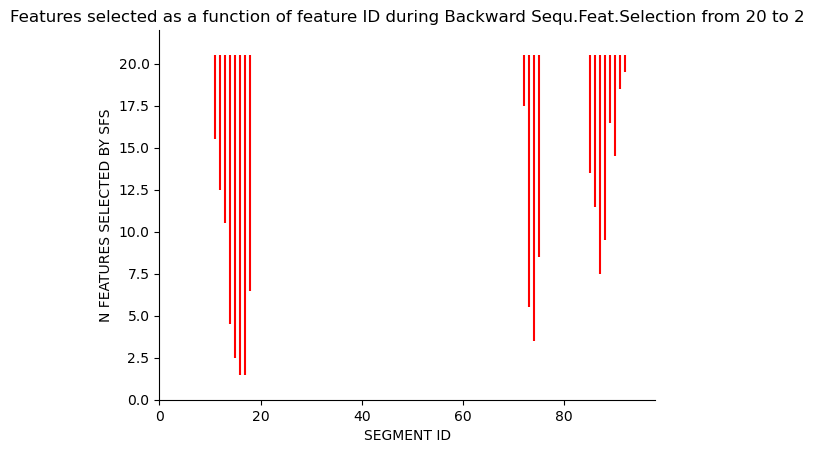

In [26]:
list_of_selfeatures=np.load('SavedFeaturesSelectedBackward20to2_CC2_FA.npy',allow_pickle=True)

fig, axs = plt.subplots()

for i in [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2]:
    x=[i]*len(list_of_selfeatures[i])
    y=np.zeros(len(list_of_selfeatures[i]))
    for k in range(len(list_of_selfeatures[i])):
        y[k]=int(list_of_selfeatures[i][k])
        list(list_of_selfeatures[i])
        # create a vertical plot
    axs.eventplot(y, colors='red', lineoffsets=i,linelengths=1, orientation='horizontal')
    axs.set_xlabel("SEGMENT ID", fontsize=10)
    axs.set_ylabel("N FEATURES SELECTED BY SFS", fontsize=10)
    axs.set_title('Features selected as a function of feature ID during Backward Sequ.Feat.Selection from 20 to 2', fontsize=12)
    axs.set_xlim(0,98)
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)

### KMEANS 2 Clusters vs predictions group or/ JND